<a href="https://colab.research.google.com/github/Moh-Nafi/Neural_Network_Projects/blob/main/(Multi_Class)Convolutional_Neural_Network/CNN_Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN to recognize Rock/Paper/Scissors

In this project, we will train a convolution neural network to recognize gesture Rock/Paper/Scissors.

## Load Rock/Paper/Scissors Dataset
First we download the data and put them into its own directories for model training and evaluation. There are two dataset in zip format. Download each and put them into the corresponding directories.

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.autograph.set_verbosity(0)

In [3]:
import tensorflow_datasets as tfds
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling tmp/rock_paper_scissors/3.0.0.incompleteSA88TQ/rock_paper_scissors-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling tmp/rock_paper_scissors/3.0.0.incompleteSA88TQ/rock_paper_scissors-test.tfrecord*...:   0%|         …

Dataset rock_paper_scissors downloaded and prepared to tmp/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [4]:
print('Raw train dataset:', dataset_train_raw)
print('Raw train dataset size:', len(list(dataset_train_raw)), '\n')

print('Raw test dataset:', dataset_test_raw)
print('Raw test dataset size:', len(list(dataset_test_raw)), '\n')

Raw train dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Raw train dataset size: 2520 

Raw test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Raw test dataset size: 372 



Let's split the training set to train and validation set.  
Also parse the datset object into image and label tuples

In [5]:
import numpy as np
img_labels = [(d[0].numpy(), d[1].numpy()) for d in list(dataset_train_raw)]
test_img_labels = [(d[0].numpy(), d[1].numpy()) for d in list(dataset_test_raw)]

train_img_labels, validation_img_labels = np.split(np.array(img_labels),[int(len(img_labels)*0.7)])

In [6]:
from collections import Counter

def count_image_per_label(img_label):
  label_set = Counter()
  for img, label in img_label:
    label_set[label] += 1

  return label_set

print(f"Training images label distribution: {count_image_per_label(train_img_labels)}")
print(f"validation images label distribution: {count_image_per_label(validation_img_labels)}")
print(f"Test images label distribution: {count_image_per_label(test_img_labels)}")

Training images label distribution: Counter({1: 603, 2: 581, 0: 580})
validation images label distribution: Counter({0: 260, 2: 259, 1: 237})
Test images label distribution: Counter({2: 124, 1: 124, 0: 124})


Put images for train, validation, and test into corresponding folders. For each dataset, split the images for different label into different directories. Labels are integer, but they are mapped to different classes

In [7]:
import os
int2label = {
    0: 'rock',
    1: 'paper',
    2: 'scissors',
}

def save_imgs(img_labels, output_dir):
  for i, img_label in enumerate(img_labels):
    img, label_id = img_label
    label_dir = os.path.join(output_dir, str(int2label[label_id]))

    if not os.path.exists(label_dir):
      os.makedirs(label_dir, exist_ok=True)

    tf.keras.utils.save_img(
        os.path.join(label_dir,  f"{i}.png"), img
    )

train_dir = '/tmp/train'
validation_dir = '/tmp/validation'
test_dir = '/tmp/test'

save_imgs(train_img_labels, train_dir)
save_imgs(validation_img_labels, validation_dir)
save_imgs(test_img_labels, test_dir)

After running the folloiwng code, you will have exactly 840 images for each gesture, for train and validation set combined.

In [8]:
rock_dir = os.path.join('/tmp/train/rock')
paper_dir = os.path.join('/tmp/train/paper')
scissors_dir = os.path.join('/tmp/train/scissors')


print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = [os.path.join(rock_dir, p) for p in os.listdir(rock_dir)]
print(rock_files[:10])

paper_files = [os.path.join(paper_dir, p) for p in os.listdir(paper_dir)]
print(paper_files[:10])

scissors_files = [os.path.join(scissors_dir, p) for p in os.listdir(scissors_dir)]
print(scissors_files[:10])

total training rock images: 580
total training paper images: 603
total training scissors images: 581
['/tmp/train/rock/1637.png', '/tmp/train/rock/536.png', '/tmp/train/rock/1171.png', '/tmp/train/rock/74.png', '/tmp/train/rock/321.png', '/tmp/train/rock/430.png', '/tmp/train/rock/926.png', '/tmp/train/rock/762.png', '/tmp/train/rock/427.png', '/tmp/train/rock/404.png']
['/tmp/train/paper/697.png', '/tmp/train/paper/1227.png', '/tmp/train/paper/244.png', '/tmp/train/paper/25.png', '/tmp/train/paper/132.png', '/tmp/train/paper/1057.png', '/tmp/train/paper/436.png', '/tmp/train/paper/546.png', '/tmp/train/paper/1038.png', '/tmp/train/paper/1048.png']
['/tmp/train/scissors/223.png', '/tmp/train/scissors/1081.png', '/tmp/train/scissors/395.png', '/tmp/train/scissors/348.png', '/tmp/train/scissors/193.png', '/tmp/train/scissors/1537.png', '/tmp/train/scissors/1342.png', '/tmp/train/scissors/991.png', '/tmp/train/scissors/1647.png', '/tmp/train/scissors/98.png']


Now, let's plot 2 images from each class.  You wil find those images are taken from different views and images vary a lot even for the same gesture.

/tmp/train/rock/1637.png
Image dimensions: (300, 300, 3)


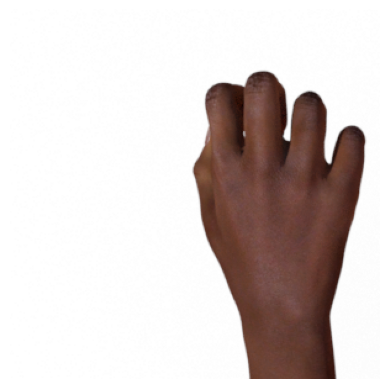

/tmp/train/rock/536.png
Image dimensions: (300, 300, 3)


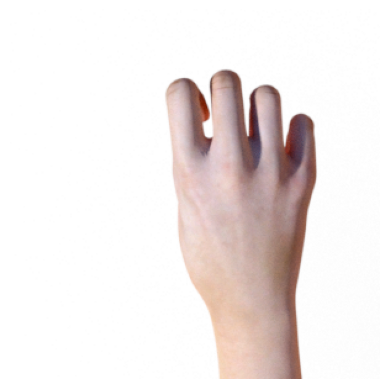

/tmp/train/paper/697.png
Image dimensions: (300, 300, 3)


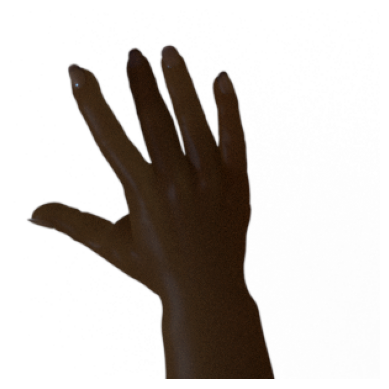

/tmp/train/paper/1227.png
Image dimensions: (300, 300, 3)


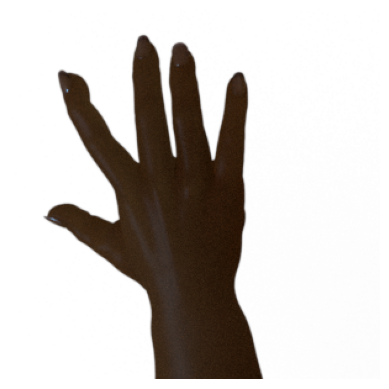

/tmp/train/scissors/223.png
Image dimensions: (300, 300, 3)


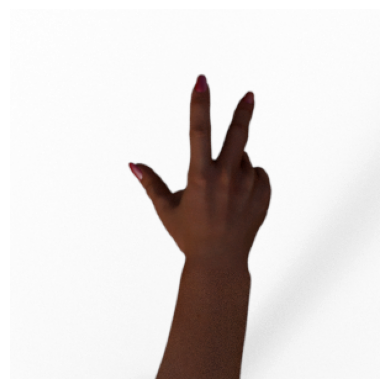

/tmp/train/scissors/1081.png
Image dimensions: (300, 300, 3)


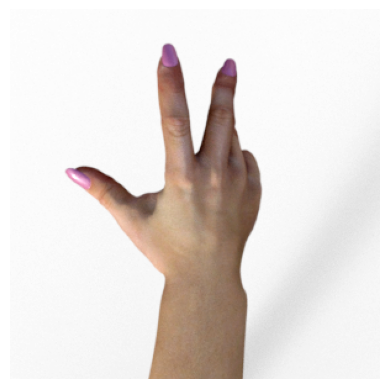

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = rock_files[0:pic_index]
next_paper = paper_files[0:pic_index]
next_scissors = scissors_files[0:pic_index]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
    print(img_path)
    img = mpimg.imread(img_path)
    print("Image dimensions:", img.shape)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## TASK 1: Build a fully connect Neural Network
We will build a neural networks with two FULLY CONNECTED layers to classify the gesture images.You are free to experiment with different structure of the network, data augmentation, dropout, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.  Watch out for overfitting.

Note that you should set test aside when you train your model.

In [10]:
# Building and training the model network using 2 fully connected layers.
# Each layer with 512 hidden units

from keras.preprocessing.image import ImageDataGenerator
# Creating generator for data preprocessing.
train_datagen = ImageDataGenerator(rescale=1./255.)
validation_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

batch_size = 40
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size = batch_size,
    class_mode = 'sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size= batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size= batch_size,
    class_mode='sparse'
)

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

# Compiling the model architecture
model = Sequential([
    Flatten(input_shape=(300, 300, 3)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Found 1764 images belonging to 3 classes.
Found 756 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/15
45/45 [==============================] - 17s 261ms/step - loss: 82.7215 - accuracy: 0.4082 - val_loss: 27.0090 - val_accuracy: 0.3638
Epoch 2/15
45/45 [==============================] - 19s 418ms/step - loss: 7.7080 - accuracy: 0.5930 - val_loss: 0.7861 - val_accuracy: 0.9061
Epoch 3/15
45/45 [==============================] - 14s 319ms/step - loss: 1.2182 - accuracy: 0.7636 - val_loss: 0.3737 - val_accuracy: 0.8690
Epoch 4/15
45/45 [==============================] - 13s 294ms/step - loss: 0.2765 - accuracy: 0.9223 - val_loss: 0.3643 - val_accuracy: 0.9087
Epoch 5/15
45/45 [==============================] - 13s 302ms/step - loss: 0.9784 - accuracy: 0.8061 - val_loss: 7.8570 - val_accuracy: 0.3651
Epoch 6/15
45/45 [==============================] - 13s 288ms/step - loss: 1.7913 - accuracy: 0.7137 - val_loss: 0.4302 - val_accuracy: 0.9418
Epoch 7/15
45/45

In [11]:
# Evaluating model accuracy on test data
loss_value, accuracy = model.evaluate_generator(test_generator,len(test_generator))
print(f'Loss Value : {loss_value}')
print(f'Accuracy : {accuracy}')

Loss Value : 3.0950117111206055
Accuracy : 0.5107526779174805


Model accuracy is low on test set (51%).

## TASK 2: Build Convolution Neural Network
Now, let's try a convolution neural network (CNN) and see if we can achieve better performance. We will start by selecting the epoch to be 10.

In [12]:
# Building and training CNN model WITHOUT data augmentation
# Convolution neural network with 4 convolution layers. Each has kernal size 3x3
# Also adding a drop out layer for regularization
from keras import layers
from keras import models

model2 = models.Sequential()
#1st layer
model2.add(layers.Conv2D(filters = 32, kernel_size= (3,3),activation = 'relu', input_shape = (300,300,3)))
model2.add(layers.MaxPool2D((2,2)))
#2nd layer
model2.add(layers.Conv2D(filters = 64, kernel_size= (3,3),activation = 'relu', input_shape = (300,300,3)))
model2.add(layers.MaxPool2D((2,2)))
#3rd layer
model2.add(layers.Conv2D(filters = 128, kernel_size= (3,3),activation = 'relu', input_shape = (300,300,3)))
model2.add(layers.MaxPool2D((2,2)))
#4th layer
model2.add(layers.Conv2D(filters = 256, kernel_size= (3,3),activation = 'relu', input_shape = (300,300,3)))
model2.add(layers.MaxPool2D((2,2)))

model2.add(layers.Flatten())

#Drop out layer
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(512,activation= 'relu'))
model2.add(layers.Dense(3,activation= 'softmax'))

# Training the model

batch_size = 20

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

Epoch 1/10
45/45 [==============================] - 25s 321ms/step - loss: 0.8986 - accuracy: 0.6678 - val_loss: 0.1244 - val_accuracy: 0.9735
Epoch 2/10
45/45 [==============================] - 12s 273ms/step - loss: 0.0441 - accuracy: 0.9892 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 13s 283ms/step - loss: 0.0285 - accuracy: 0.9915 - val_loss: 0.0060 - val_accuracy: 0.9974
Epoch 4/10
45/45 [==============================] - 12s 274ms/step - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 12s 277ms/step - loss: 6.5665e-04 - accuracy: 1.0000 - val_loss: 2.3980e-04 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 12s 271ms/step - loss: 1.6075e-04 - accuracy: 1.0000 - val_loss: 1.9695e-05 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 12s 273ms/step - loss: 4.0184e-05 - accuracy: 1.0000 - val_loss: 8.8360e-0

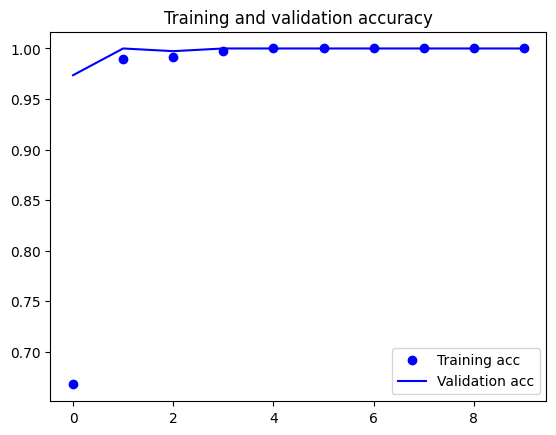

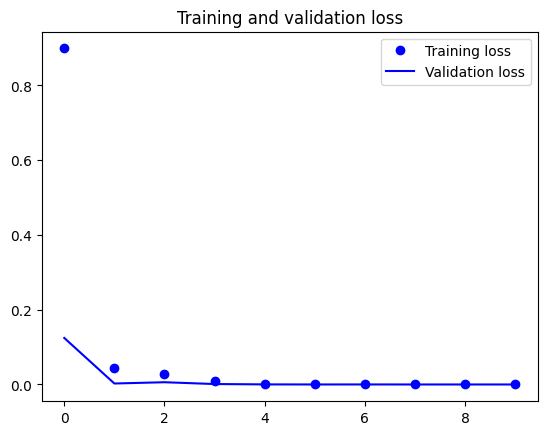

In [14]:
# Plotting the training and validation accuracy + training and validation loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [15]:
# Evaluating model accuracy on test data

loss_value, accuracy = model2.evaluate_generator(test_generator,len(test_generator))
print(f'Loss Value : {loss_value}')
print(f'Accuracy : {accuracy}')

Loss Value : 1.9432525634765625
Accuracy : 0.8091397881507874


**Model accuracy has improved by using CNN from 51% to 81%**

## TASK 3: Build Convolution Neural Network with data augmentation
We could achieve higher accuracy through data augmentation. For the same model above, let's add data augmentation to training and evaluate on test set to compare the performance

In [16]:
# Build and train CNN model and add data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

batch_size = 20

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='sparse'
)

# Model architecture
model3 = models.Sequential()

# 1st layer
model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3)))
model3.add(layers.MaxPooling2D((2, 2)))

# 2nd layer
model3.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

# 3rd layer
model3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

# 4th layer
model3.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())

# Dropout layer
model3.add(layers.Dropout(0.5))

model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(3, activation='softmax'))

# Training the model with data augmentation
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer=Adam(learning_rate=0.001),
               metrics=['accuracy'])

history = model3.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Found 1764 images belonging to 3 classes.
Found 756 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/10
89/89 [==============================] - 68s 717ms/step - loss: 1.1310 - accuracy: 0.4410 - val_loss: 0.8353 - val_accuracy: 0.5979
Epoch 2/10
89/89 [==============================] - 58s 649ms/step - loss: 0.7454 - accuracy: 0.6417 - val_loss: 0.7549 - val_accuracy: 0.6243
Epoch 3/10
89/89 [==============================] - 61s 685ms/step - loss: 0.5325 - accuracy: 0.7687 - val_loss: 0.3909 - val_accuracy: 0.8638
Epoch 4/10
89/89 [==============================] - 56s 628ms/step - loss: 0.4400 - accuracy: 0.8197 - val_loss: 0.3024 - val_accuracy: 0.8836
Epoch 5/10
89/89 [==============================] - 57s 641ms/step - loss: 0.3387 - accuracy: 0.8724 - val_loss: 0.2604 - val_accuracy: 0.9034
Epoch 6/10
89/89 [==============================] - 57s 642ms/step - loss: 0.2958 - accuracy: 0.8946 - val_loss: 0.2278 - val_accuracy: 0.9206
Epoch 7/10
89/89 [

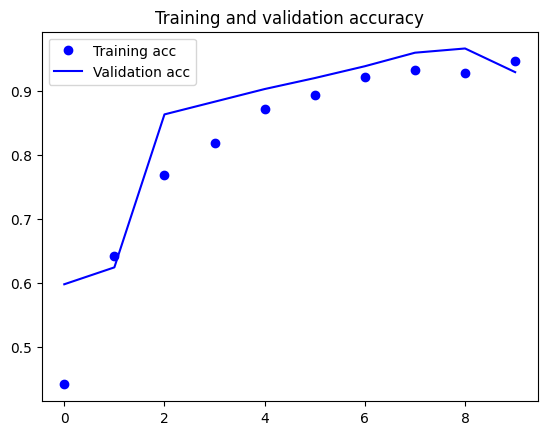

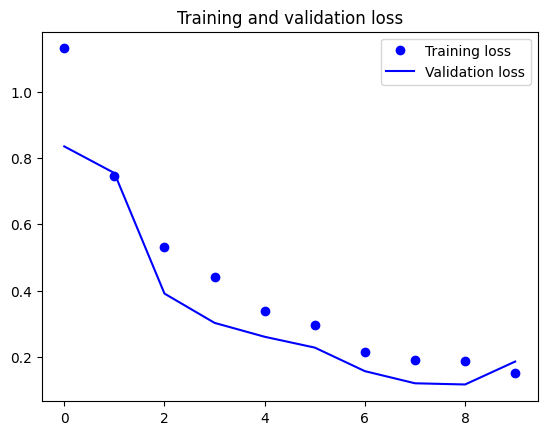

In [17]:
# Plotting the training and validation accuracy + training and validation loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
# Evaluating model accuracy on test data
loss_value, accuracy = model3.evaluate_generator(test_generator, len(test_generator))
print(f'Loss Value: {loss_value}')
print(f'Accuracy: {accuracy}')

Loss Value: 0.26439663767814636
Accuracy: 0.9032257795333862


**Model accuracy has improved sinificantly by using augmented data from 81% to 90%.**

## Test the model by yourself
You can now run the following code and use the model you trained to classify images uploaded from your laptop. Let me know how your model performs on the new unseen images by commenting on this line.

Happy Exploration!

In [ ]:
import numpy as np
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(300,300))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model3.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)

  print(fn)
  print(classes)
  print(y_classes)

  class_names = ['paper', 'rock', 'scissors']

  print(class_names[np.argmax(classes)])
